In [1]:
# coding: utf-8
###data
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
base_x, base_y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0, center_box=(1, 20))
#随机生成3类数据
base_n = len(base_y)
base_y=base_y.reshape((base_n,1))

#normalization 
base_x-=base_x.min()
base_x/=base_x.max()

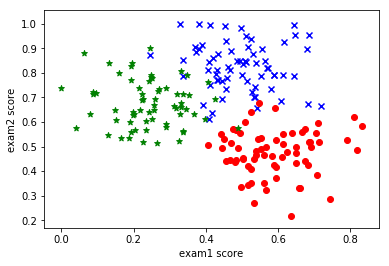

In [2]:
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    x1 = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    x2 = np.where(y[:,0]==1)
    x3 = np.where(y[:,0]==2)
    ax1 = plt.scatter(x[x1,0], x[x1,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[x2,0], x[x2,1], marker = 'o', color = 'r')  
    ax3 = plt.scatter(x[x3,0], x[x3,1], marker = '*', color = 'g') 
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.show()

plotData(base_x,base_y)

前面的y是为了画图和直观的验证，后面一律只用x

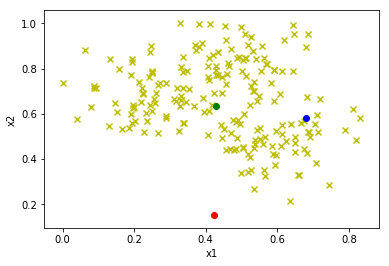

In [3]:
#随机选取k个质心点
#import numpy as np
#import matplotlib.pyplot as plt
#base_x = np.array([[0.2,0.2],[0.4,0.4],[0.6,0.6]])


k = 3
mid_x = np.random.random_sample([k,2]) #六位数，依次对应中心点的坐标

def plotDataMid(x,mid):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    ax1 = plt.scatter(x[:,0], x[:,1], marker = 'x', color = 'y')  
    
    ax2 = plt.scatter(mid[0,0], mid[0,1], marker = 'o', color = 'r')  
    ax3 = plt.scatter(mid[1,0], mid[1,1], marker = 'o', color = 'b') 
    ax4 = plt.scatter(mid[2,0], mid[2,1], marker = 'o', color = 'g') 

    plt.xlabel('x1') 
    plt.ylabel('x2')
    
    plt.show()

plotDataMid(base_x,mid_x)

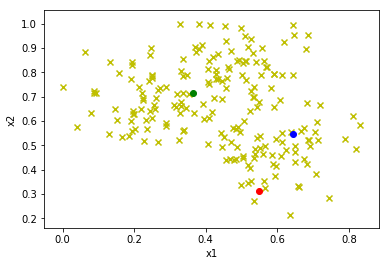

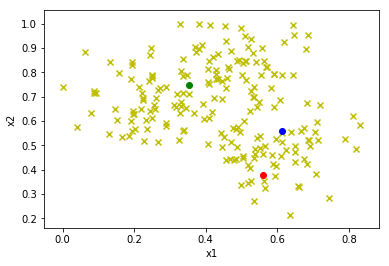

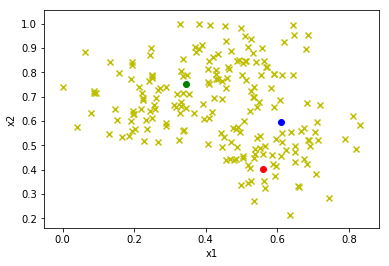

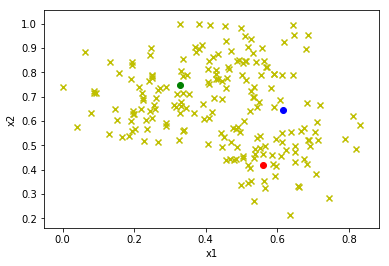

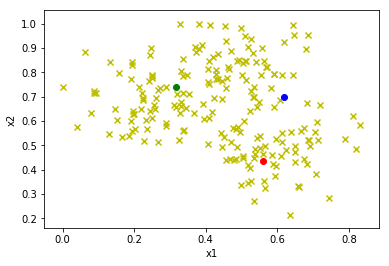

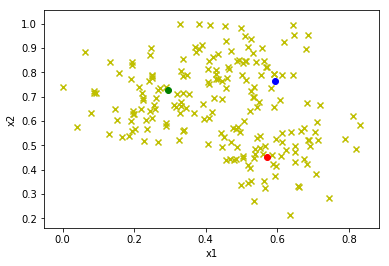

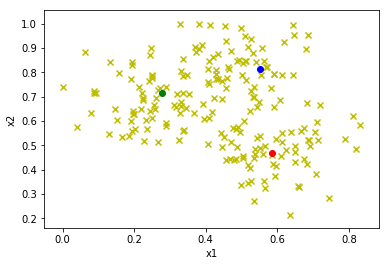

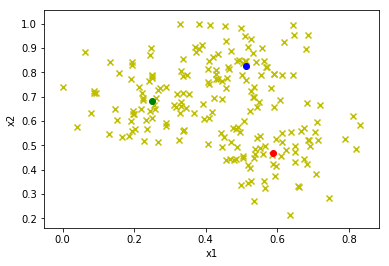

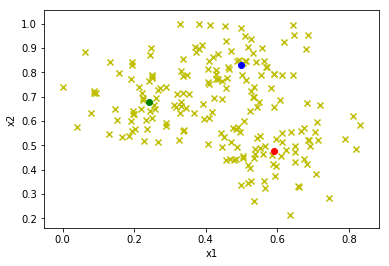

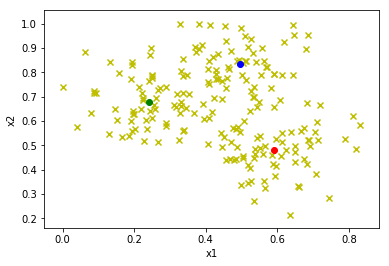

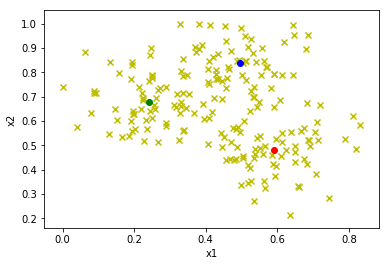

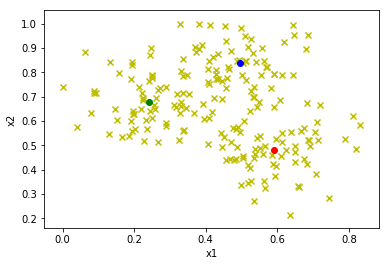

iterations times: 12


In [4]:
def plotCate(x,mid_x):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    c0=np.array(x[0])
    c0_t=c0.T
    ax0 = plt.scatter(c0_t[0], c0_t[1], marker = 'x', color = 'b') 
    c1=np.array(x[1])
    c1_t=c1.T
    ax1 = plt.scatter(c1_t[0], c1_t[1], marker = 'x', color = 'g')  
    c2=np.array(x[2])
    c2_t=c2.T
    ax2 = plt.scatter(c2_t[0], c2_t[1], marker = 'x', color = 'y')  
    
    c0 = plt.scatter(mid_x[0,0], mid_x[0,1], marker = 'o', color = 'r')  
    c1 = plt.scatter(mid_x[1,0], mid_x[1,1], marker = '+', color = 'r') 
    c2 = plt.scatter(mid_x[2,0], mid_x[2,1], marker = '*', color = 'r')   
    plt.show()
    
def train(x,mid_x,k):
    #计算每个点的类别
    c = [[] for i in range(k)] #分别对应三类
    for i in range(len(x)):
        mid_x_t=np.power((mid_x-x[i]),2)
        dist = np.sum(mid_x_t,axis=1)
        c_i = np.argmin(dist)
        c[c_i].append(x[i].tolist())
    #重新计算中心点
    for i in range(k):
        mid_x[i,:] = np.mean(c[i],axis = 0)
    return mid_x

count = 0
while 1:
    mid_x_old = mid_x.copy()
    mid_x=train(base_x,mid_x,k)
    plotDataMid(base_x,mid_x)
    count +=1
    if (mid_x == mid_x_old).all():  #比较两个向量对应元素是否全部相等
        print('iterations times:',count)
        break